In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
sys.path.append("../scripts")

import preprocessing as dp
import data_extraction as de
import exploratory_analysis as eda

In [2]:
df = de.load_data('../data/csv.csv')

d:\Personal Files\KIAM Notebooks\KIAM Week3\notebooks\../scripts\data_extraction.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Data Loaded Successfully


In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0


In [4]:
df.shape

(1000098, 52)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               104888 non-null   object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [6]:
# Provides unique value in every single colummn
# Useful in Identifying columns that have the same value entirely and columns that don't have any unique values
# This columns dosn't offer any significant information to the analysis. 
df.nunique()

UnderwrittenCoverID         116532
PolicyID                      7000
TransactionMonth                23
IsVATRegistered                  2
Citizenship                      3
LegalType                        6
Title                            5
Language                         1
Bank                            11
AccountType                      3
MaritalStatus                    3
Gender                           3
Country                          1
Province                         9
PostalCode                     888
MainCrestaZone                  16
SubCrestaZone                   45
ItemType                         1
mmcode                         427
VehicleType                      5
RegistrationYear                25
make                            46
Model                          411
Cylinders                        7
cubiccapacity                  122
kilowatts                       82
bodytype                        13
NumberOfDoors                    6
VehicleIntroDate    

In [7]:
## Intialize The Datapreproccessing class
dp = dp.DataPreprocessing(df)

In [8]:
# Change the TranscationMonth and VehicleIntroDate column to datetime data type
dp.to_datetime()

d:\Personal Files\KIAM Notebooks\KIAM Week3\notebooks\../scripts\preprocessing.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data['VehicleIntroDate'] = pd.to_datetime(self.data['VehicleIntroDate'], errors='coerce')


In [9]:
# Drop columns that are not necessary for the analysis
dp.drop_columns()

In [10]:
# duplicated values
df.duplicated().sum()

np.int64(1171)

In [11]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

### Univariate Analysis 

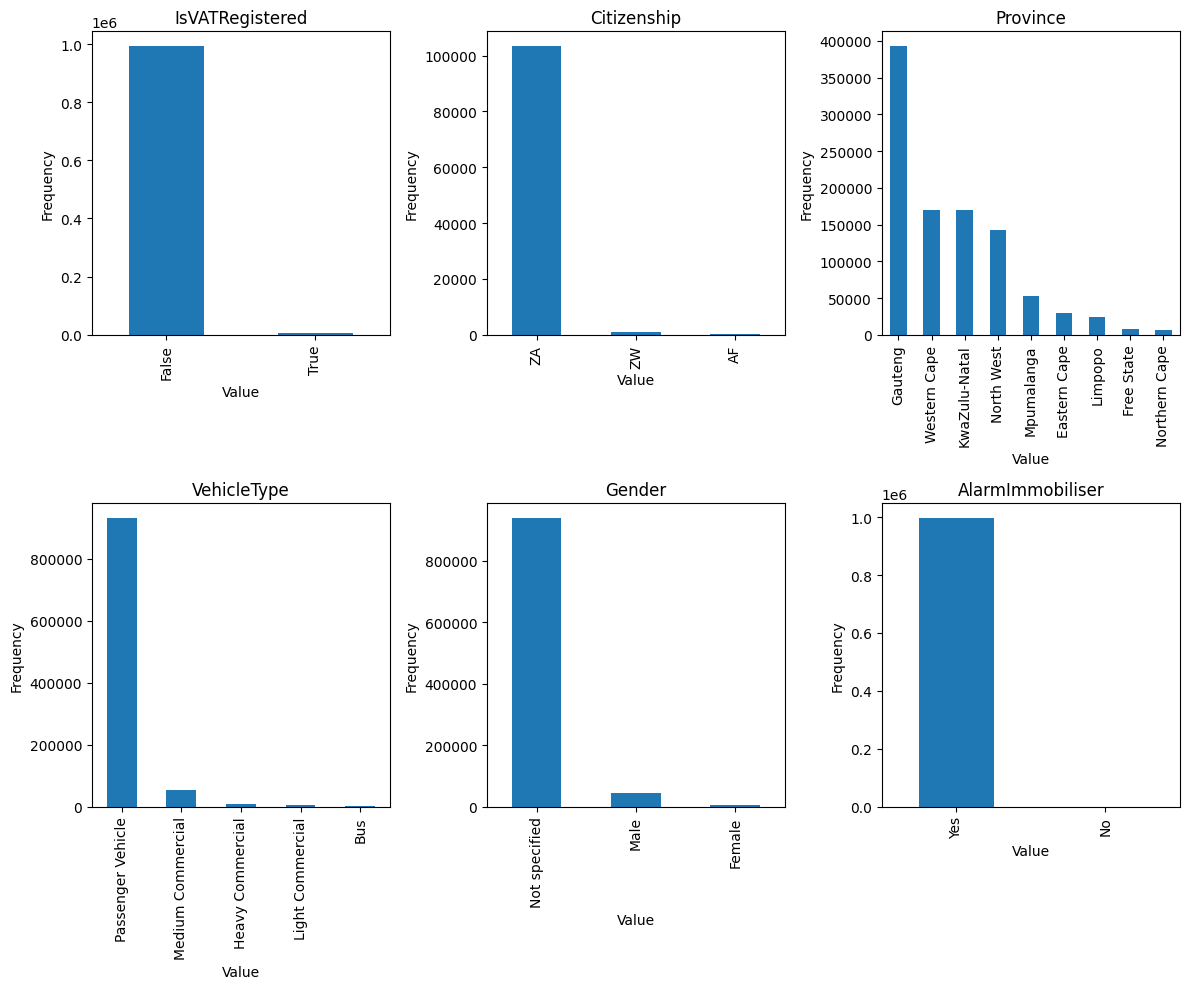

In [12]:
# Plot a barplot for categorical datas
dp.categorical_plot_1()

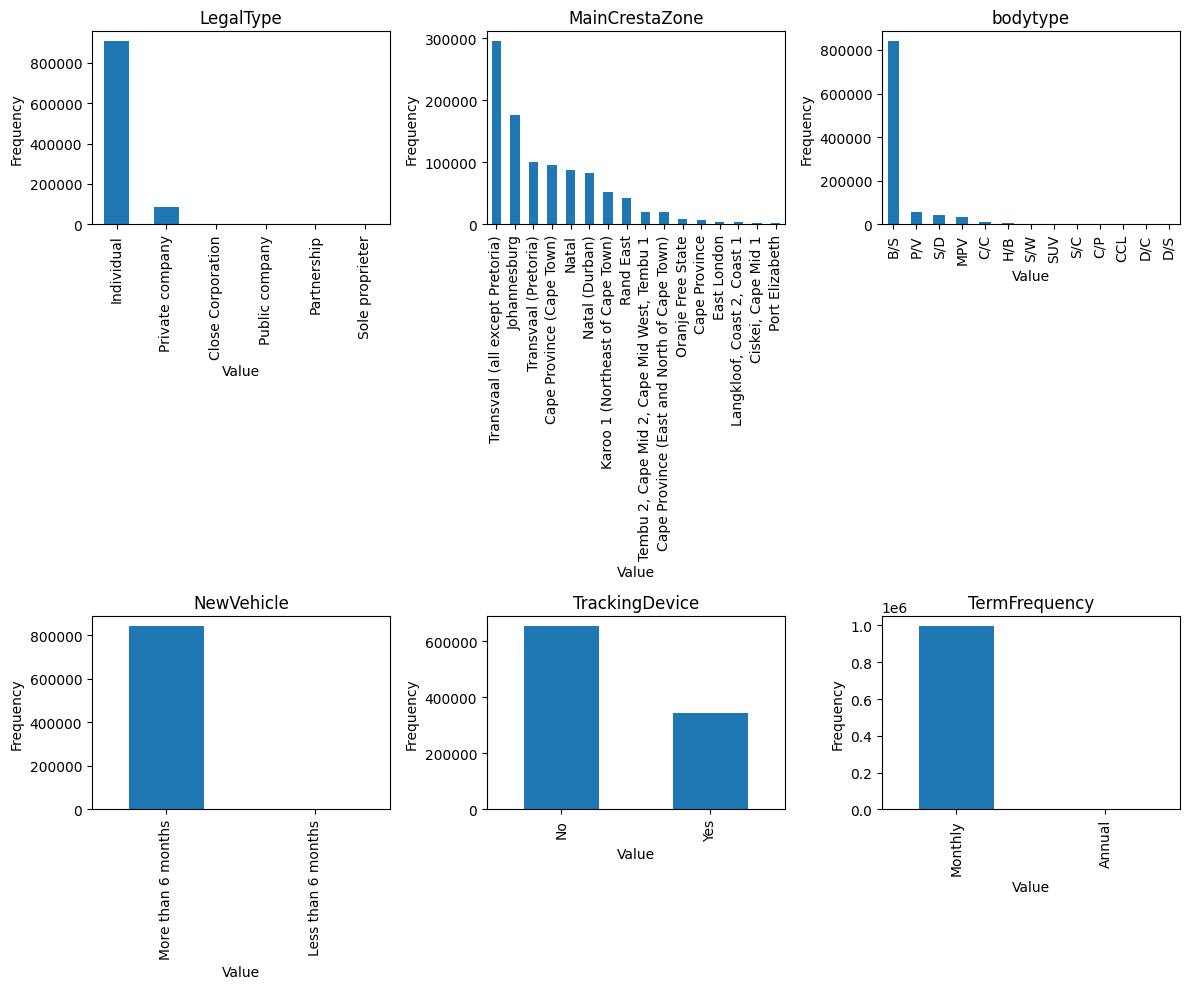

In [13]:
# Categrical bar plot 2
dp.categorical_plot_2()

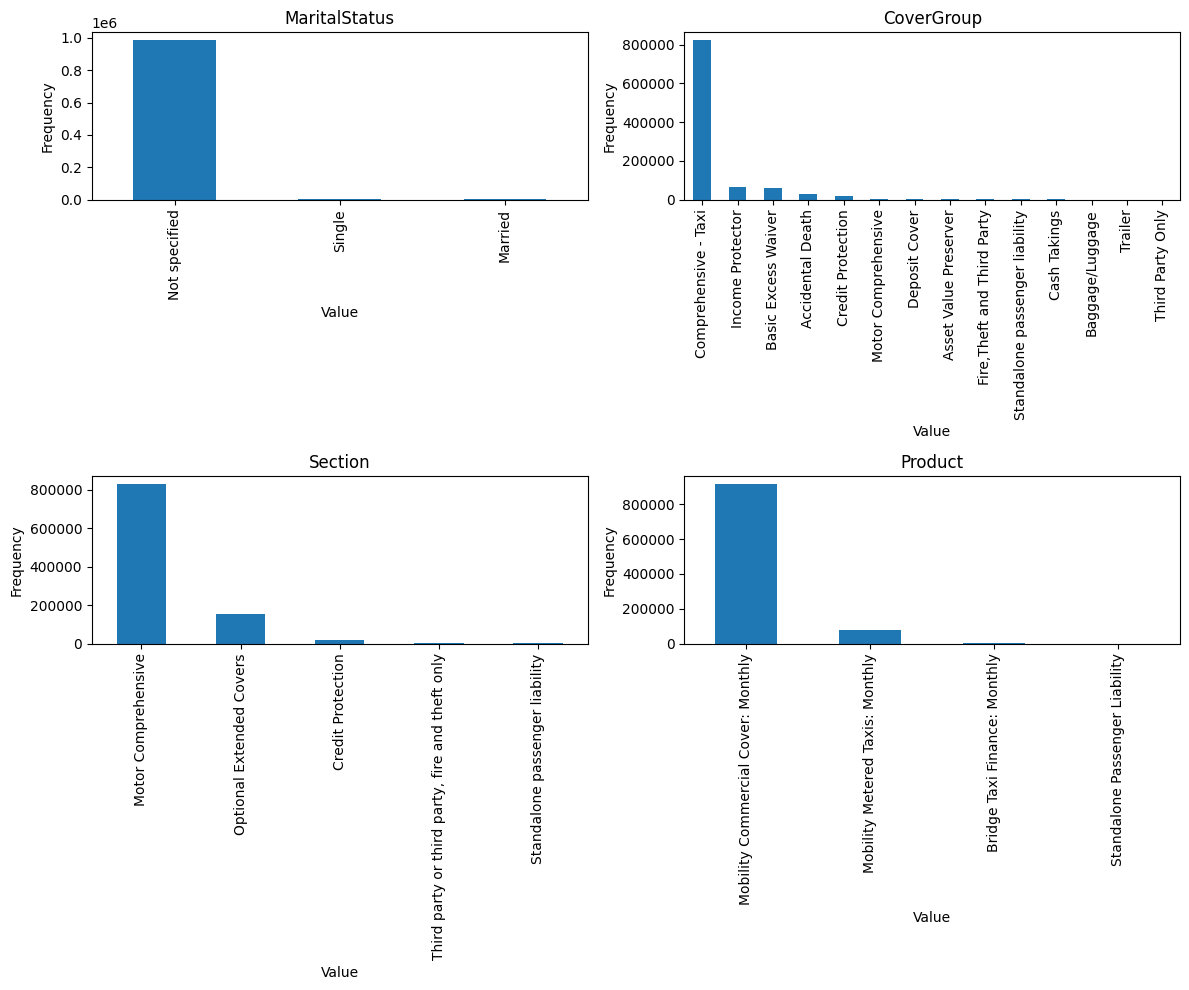

In [14]:
# Categrical bar plot 3
dp.categorical_plot_3()

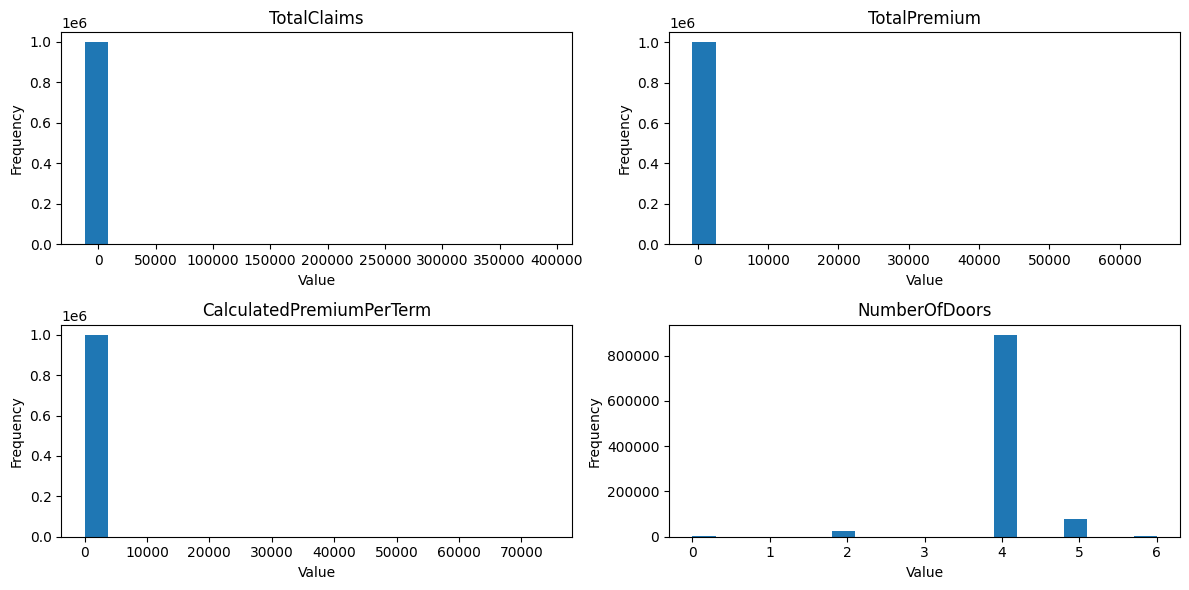

In [15]:
## Numerical columns distribution
dp.numerical_dist()

In [16]:
# Identify Missing values
df.isnull().sum()

UnderwrittenCoverID              0
PolicyID                         0
TransactionMonth                 0
IsVATRegistered                  0
Citizenship                 894229
LegalType                        0
MaritalStatus                 8259
Gender                        9536
Province                         0
PostalCode                       0
MainCrestaZone                   0
SubCrestaZone                    0
VehicleType                    552
RegistrationYear                 0
make                           552
bodytype                       552
NumberOfDoors                  552
AlarmImmobiliser                 0
TrackingDevice                   0
NewVehicle                  153295
SumInsured                       0
TermFrequency                    0
CalculatedPremiumPerTerm         0
ExcessSelected                   0
CoverCategory                    0
CoverType                        0
CoverGroup                       0
Section                          0
Product             

In [17]:
#Missing values replaced with appropriate values
dp.handle_missing_values()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,MaritalStatus,Gender,Province,PostalCode,...,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,ZA,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0
1,145249,12827,2015-05-01,True,ZA,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,21.929825,0
2,145249,12827,2015-07-01,True,ZA,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0
3,145255,12827,2015-05-01,True,ZA,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,512.848070,0
4,145255,12827,2015-07-01,True,ZA,Close Corporation,Not specified,Not specified,Gauteng,1459,...,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,2015-04-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0
1000094,31520,389,2015-06-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0
1000095,31520,389,2015-08-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,395.8481,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,347.235175,0
1000096,31519,389,2014-07-01,False,ZW,Individual,Single,Male,Western Cape,7493,...,Monthly,2.6391,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,2.315000,0


In [18]:
# Check for missing values
df.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
MaritalStatus               0
Gender                      0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
VehicleType                 0
RegistrationYear            0
make                        0
bodytype                    0
NumberOfDoors               0
AlarmImmobiliser            0
TrackingDevice              0
NewVehicle                  0
SumInsured                  0
TermFrequency               0
CalculatedPremiumPerTerm    0
ExcessSelected              0
CoverCategory               0
CoverType                   0
CoverGroup                  0
Section                     0
Product                     0
TotalPremium                0
TotalClaims                 0
dtype: int64

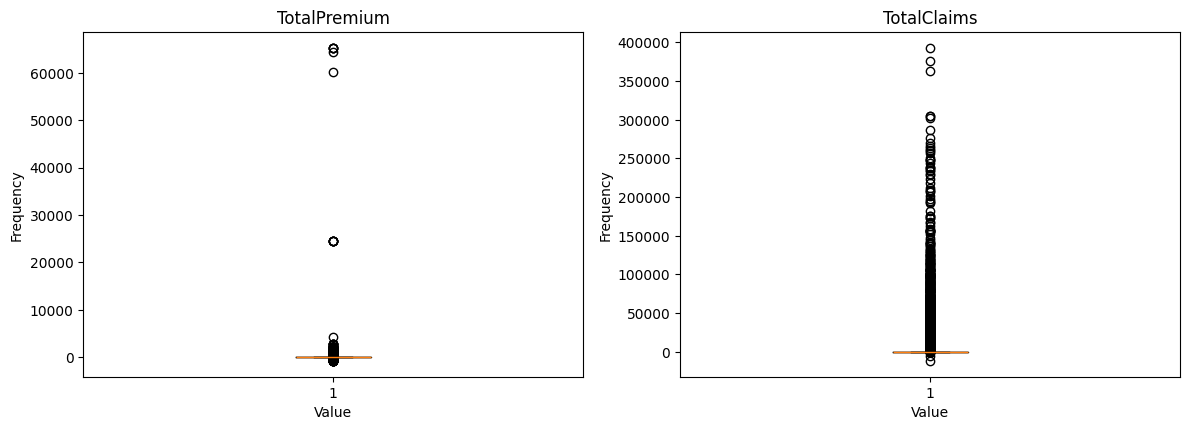

In [19]:
## Detect outliers
dp.outlier_detection()

## Bivariate Analysis

In [20]:
# Create premium to claims feature
df['PremiumToClaimsRatio'] = df['TotalPremium'] / (df['TotalClaims'] + 1)  # +1 to avoid division by zero

In [21]:
## Initialize the Data Analysis Class
da = eda.DataAnalysis(df)

 Premium to Claims Ratio calculated per IsVATRegistered :
   IsVATRegistered  PremiumToClaimsRatio
0            False             60.762127
1             True             49.301559


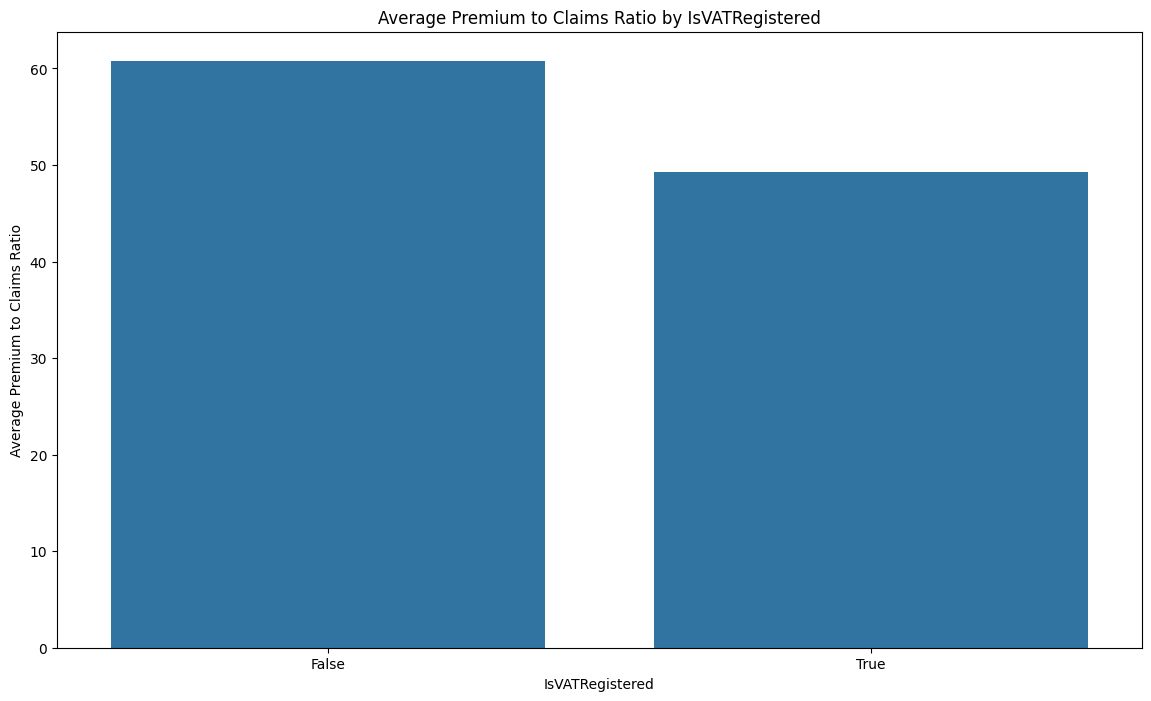

In [22]:
da.bivariate_analysis("IsVATRegistered")

### Key Insights

The Premium to claim ratio is higher for customers who are not VAT reigistered. This might be because customers who are not VAT registered are required to pay high premium.

### Observation 

The difference in the Average premium to claims ratio in both this customer is not significant.


 Premium to Claims Ratio calculated per Citizenship :
  Citizenship  PremiumToClaimsRatio
2          ZW             82.812884
0          AF             62.190731
1          ZA             60.683415


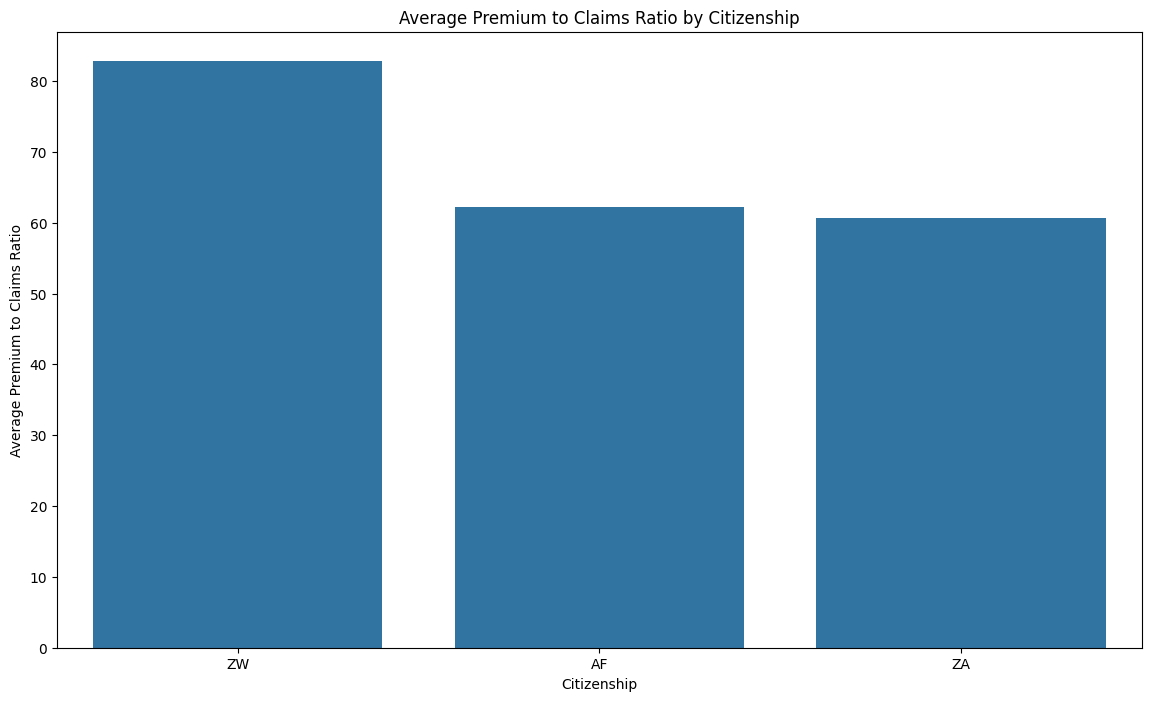

In [23]:
da.bivariate_analysis('Citizenship')

### Key Insights

ZW (Zimbabwe):

Premium to Claims Ratio: 82.81
This is the highest ratio, which suggests that the premiums collected from customers are significantly higher relative to the claims paid out. This could indicate that policies are over-priced compared to the claims frequency or severity, or that there is less risk associated with claims from Zimbabwe.

### Observation 

Customers from this region can be categorized as low risk customers. Reducing premiums for this customers would be beneficial since it attracts more customers.

 Premium to Claims Ratio calculated per LegalType :
           LegalType  PremiumToClaimsRatio
5    Sole proprieter            163.144258
4     Public company             96.339619
3    Private company             65.430555
0  Close Corporation             62.108539
1         Individual             60.199682
2        Partnership             42.339308


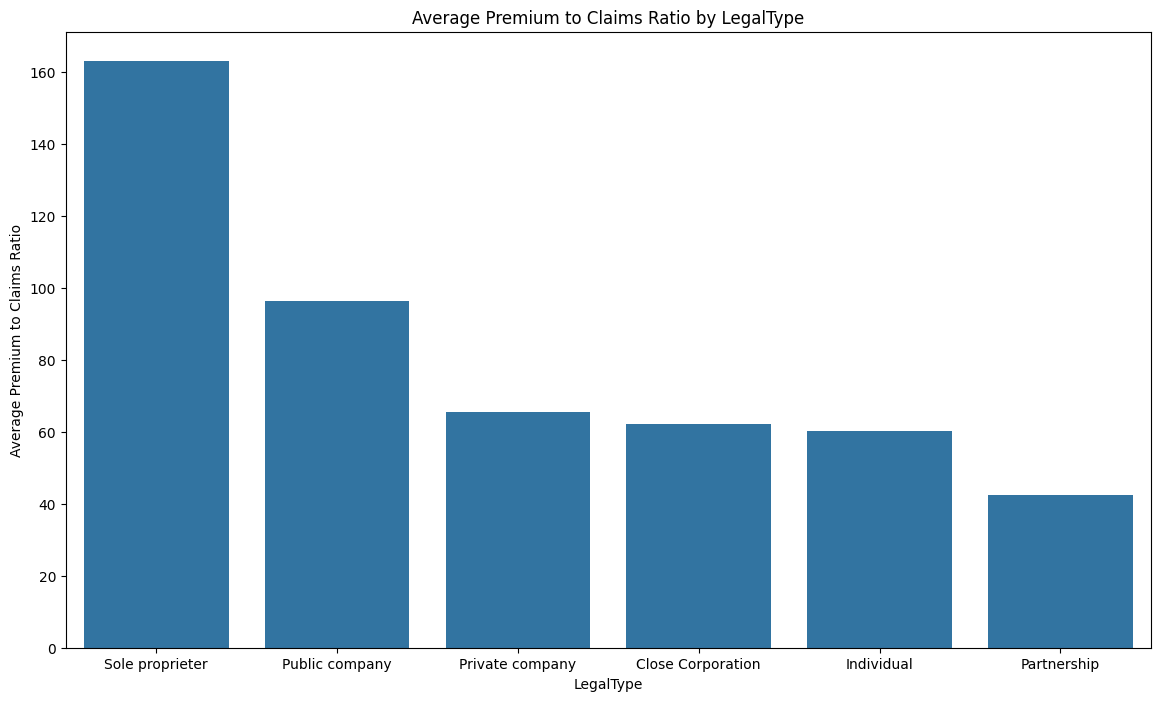

In [24]:
da.bivariate_analysis('LegalType')

### Key Insights

Sole Proprietor:

Premium to Claims Ratio: 163.14
This group has the highest Premium to Claims Ratio, suggesting that the premiums for sole proprietors are significantly higher than the claims they make. This could indicate that insurance policies for sole proprietors are priced higher relative to their risk, or there may be 
fewer claims from this group




 Premium to Claims Ratio calculated per MaritalStatus :
   MaritalStatus  PremiumToClaimsRatio
0        Married             74.985046
1  Not specified             60.823617
2         Single             28.268276


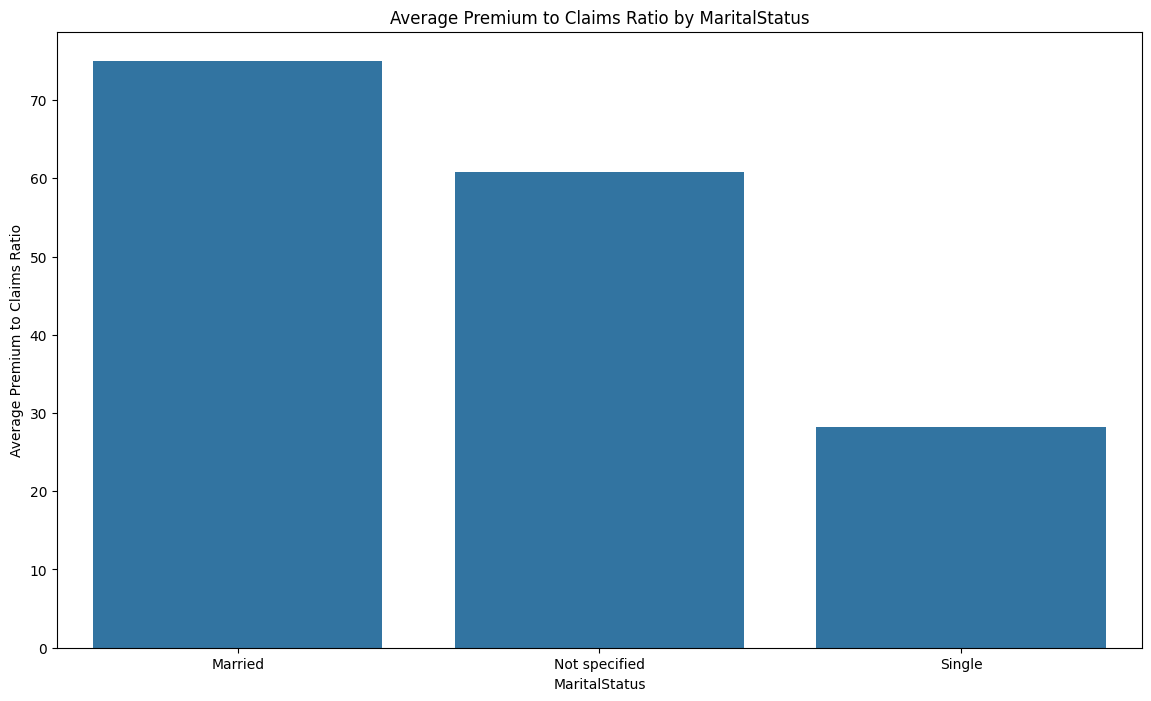

In [25]:
da.bivariate_analysis('MaritalStatus')

### Key Insights

The Single group has the lowest Premium to Claims Ratio (28.27), which suggests that they pay relatively lower premiums compared to the claims they generate. This could imply that premiums for Single individuals are underpriced relative to the claims they make, Increasing their premium would be benefeicial for the insurer.

The Married group has a higher Premium to Claims Ratio (74.99), meaning they pay more in premiums for the claims they generate. This could indicate that premiums for this group are more in line with or over the actual claims risk.

 Premium to Claims Ratio calculated per Gender :
          Gender  PremiumToClaimsRatio
2  Not specified             61.911419
0         Female             44.980259
1           Male             36.389337


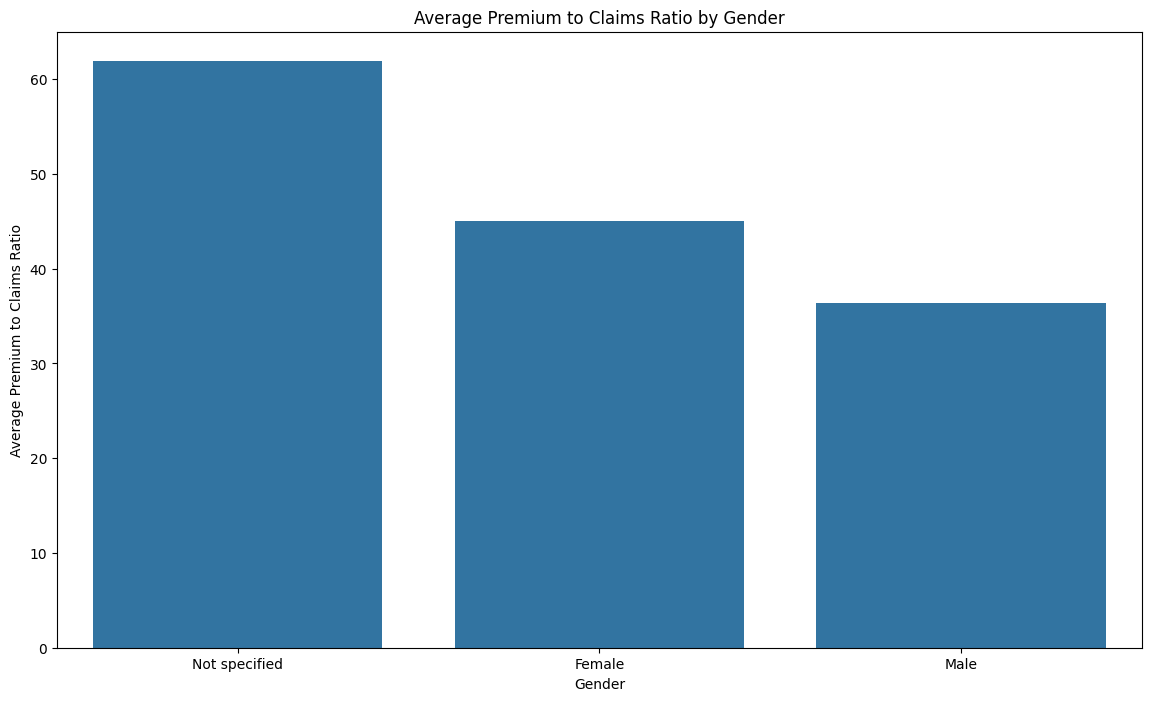

In [26]:
da.bivariate_analysis('Gender')

### Key Insights

Male individuals have the lowest Premium to Claims Ratio (36.39), suggesting they pay relatively lower premiums compared to the claims they generate. This could indicate that males might be a high-risk group if premiums are underpriced relative to their claims.

Female individuals have a slightly higher Premium to Claims Ratio (44.98) compared to males, suggesting that females might be paying somewhat higher premiums relative to the claims they make, but the difference is not large.

 Premium to Claims Ratio calculated per Province :
        Province  PremiumToClaimsRatio
3  KwaZulu-Natal             76.540845
0   Eastern Cape             70.148696
1     Free State             64.005798
4        Limpopo             61.530543
2        Gauteng             60.146972
8   Western Cape             54.355274
5     Mpumalanga             53.509314
6     North West             51.850349
7  Northern Cape             49.354012


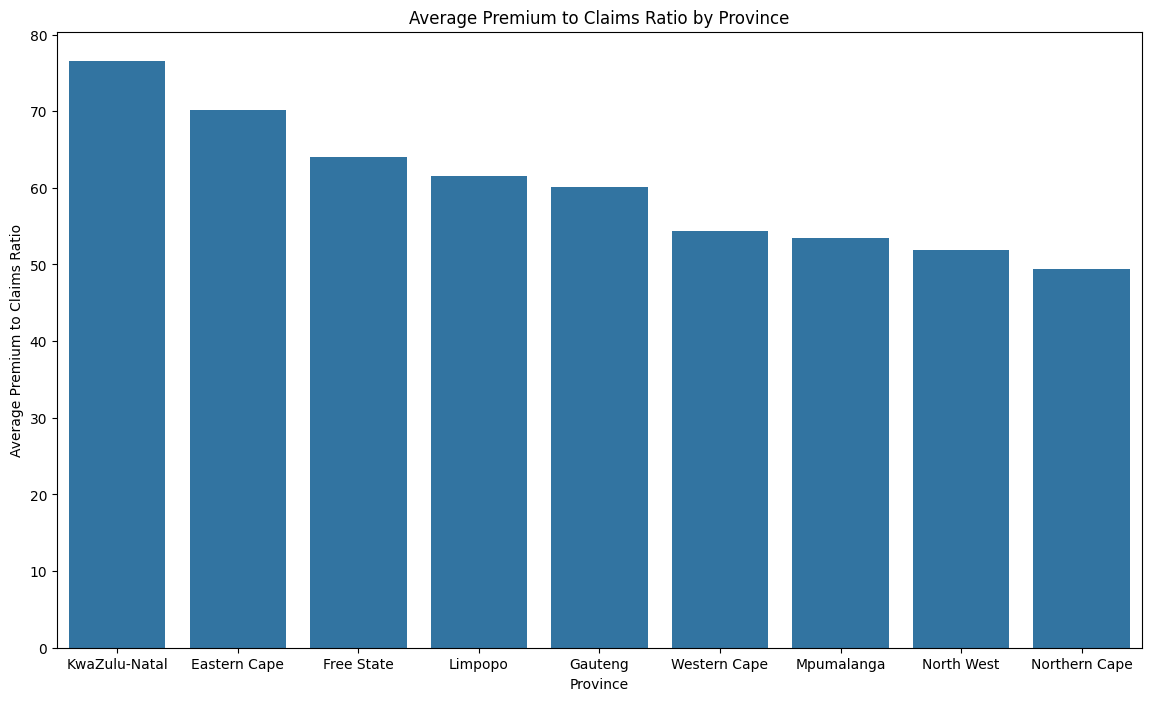

In [27]:

da.bivariate_analysis('Province')

### Key Insights

***KwaZulu-Natal*** has the highest Premium to Claims Ratio (76.54). This indicates that individuals in this province are paying significantly more in premiums compared to the claims they generate. It might be beneficial to consider adjusting premiums downward for this region.

**Eastern Cape*** follows with a Premium to Claims Ratio of 70.15, which is also relatively high.Similar to KwaZulu-Natal, this group might be in a low risk group.

 Premium to Claims Ratio calculated per MainCrestaZone :
                                 MainCrestaZone  PremiumToClaimsRatio
4                                   East London             87.556507
3                            Ciskei, Cape Mid 1             79.729172
9                                Natal (Durban)             79.143810
8                                         Natal             73.908261
13  Tembu 2, Cape Mid 2, Cape Mid West, Tembu 1             66.735258
10                            Oranje Free State             64.687467
5                                  Johannesburg             63.925595
2   Cape Province (East and North of Cape Town)             62.780532
14                         Transvaal (Pretoria)             57.896678
15              Transvaal (all except Pretoria)             54.866719
6              Karoo 1 (Northeast of Cape Town)             54.238640
1                     Cape Province (Cape Town)             53.175668
7                   Langkloof, Co

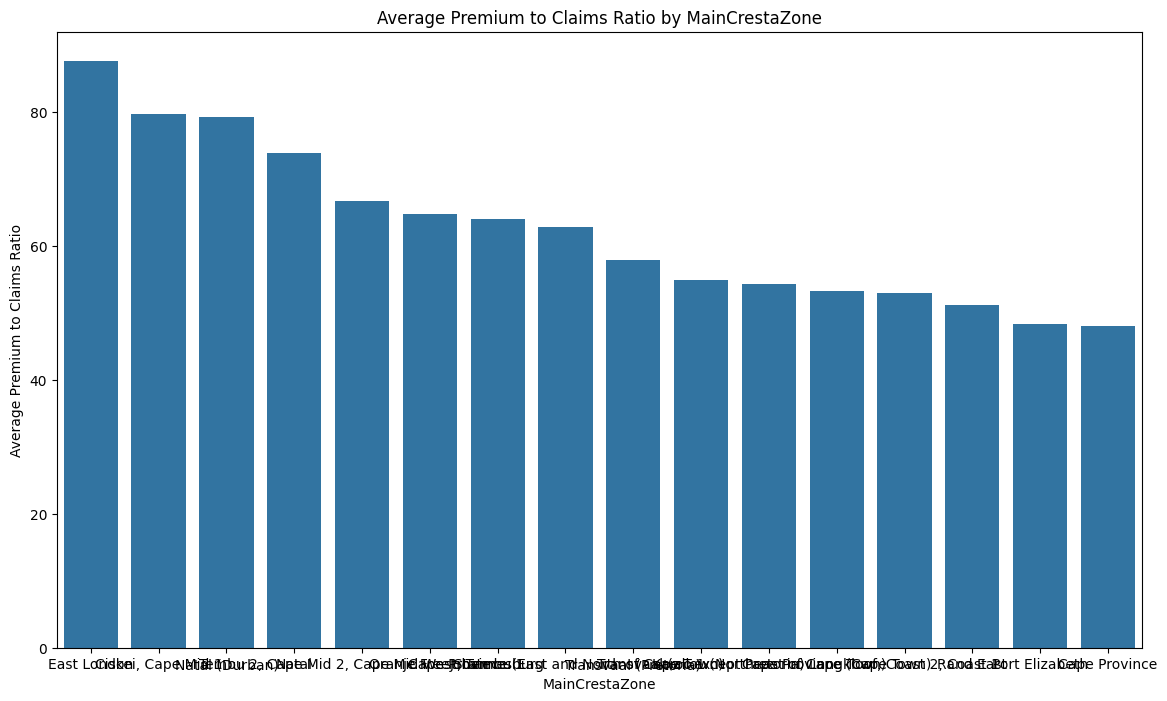

In [28]:
da.bivariate_analysis('MainCrestaZone')


 Premium to Claims Ratio calculated per VehicleType :
         VehicleType  PremiumToClaimsRatio
0                Bus             87.586075
3  Medium Commercial             71.931012
2   Light Commercial             66.605741
1   Heavy Commercial             61.760105
4  Passenger Vehicle             60.002715


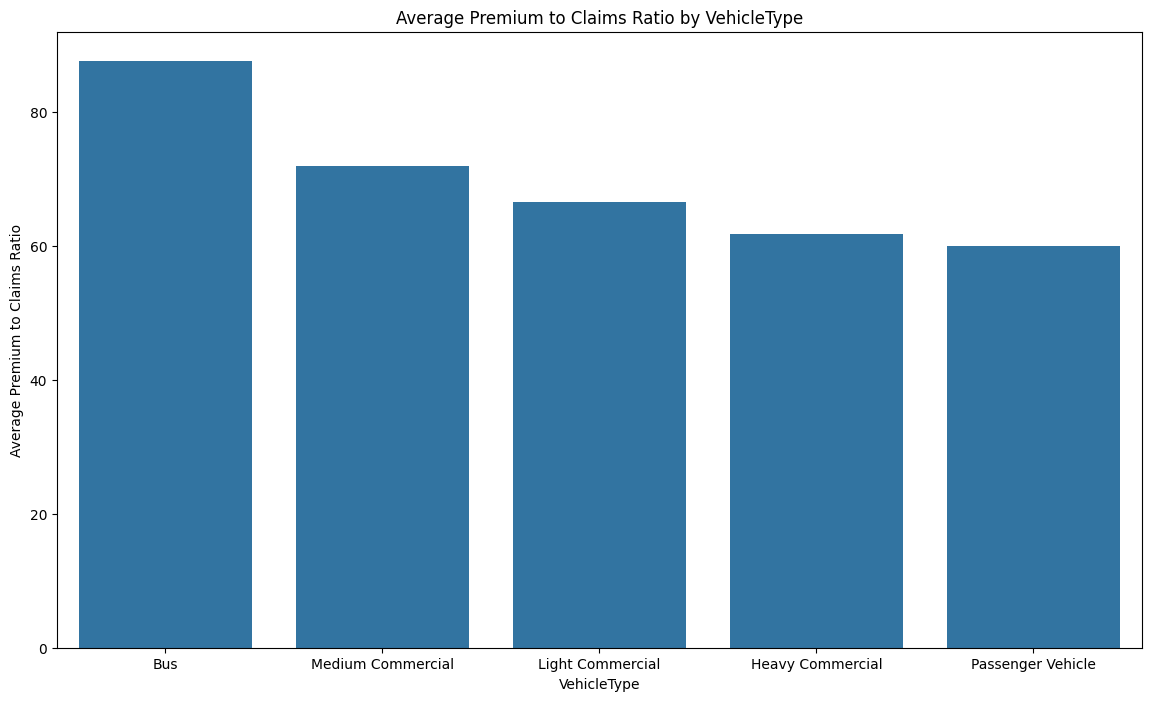

In [29]:
da.bivariate_analysis('VehicleType')

### Key Insights

**Bus*** has the highest Premium to Claims Ratio (87.59). This indicates that buses are generating significantly fewer claims compared to the premiums paid. This suggests that buses could be low-risk vehicles.




 Premium to Claims Ratio calculated per Product :
                              Product  PremiumToClaimsRatio
0        Bridge Taxi Finance: Monthly            170.803335
1  Mobility Commercial Cover: Monthly             62.036488
3      Standalone Passenger Liability             41.030356
2     Mobility Metered Taxis: Monthly             38.170512


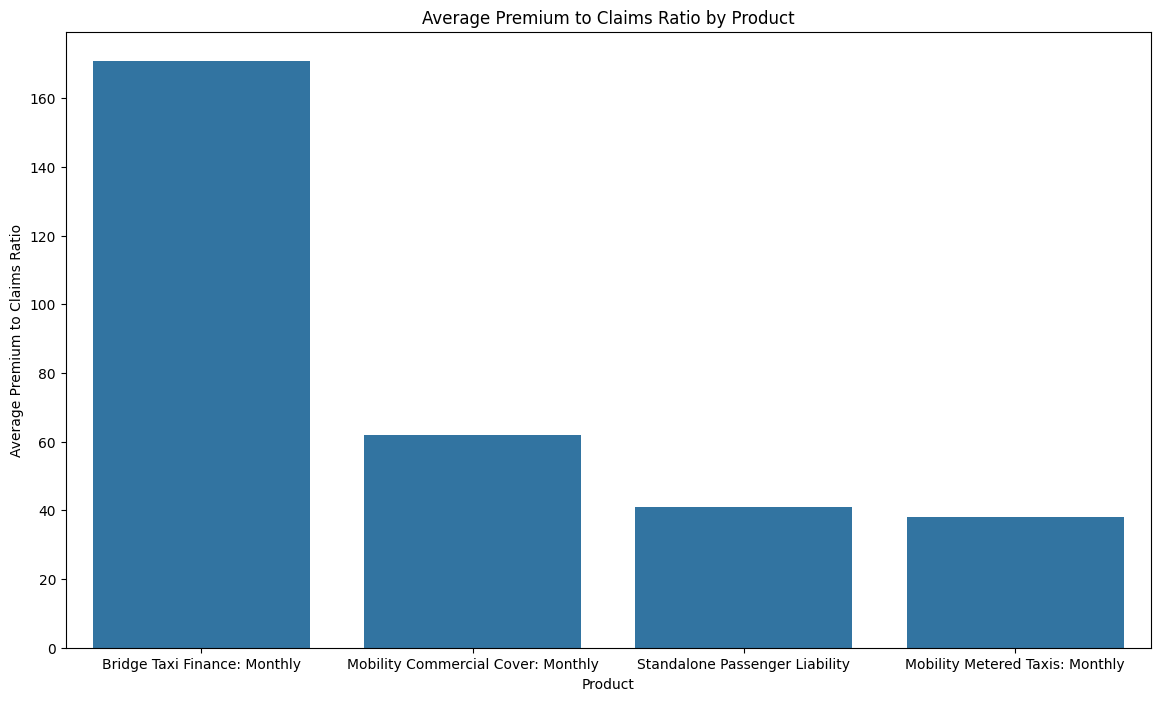

In [30]:
da.bivariate_analysis('Product')

### Key Insights

***Bridge Taxi Finance: Monthly*** has the highest Premium to Claims Ratio (170.80). This indicates that the premiums collected for this product are significantly higher than the claims paid out, suggesting that this product is generating relatively low claims compared to the premiums. It could be considered a low-risk product, and the high premiums may indicate that the product is over-priced in terms of the actual risk it covers. A potential premium reduction could make this product more competitive without increasing the risk.

 Premium to Claims Ratio calculated per Section :
                                           Section  PremiumToClaimsRatio
4  Third party or third party, fire and theft only            110.971851
0                                Credit Protection            102.331084
1                              Motor Comprehensive             62.984723
2                         Optional Extended Covers             43.180269
3                   Standalone passenger liability             41.030356


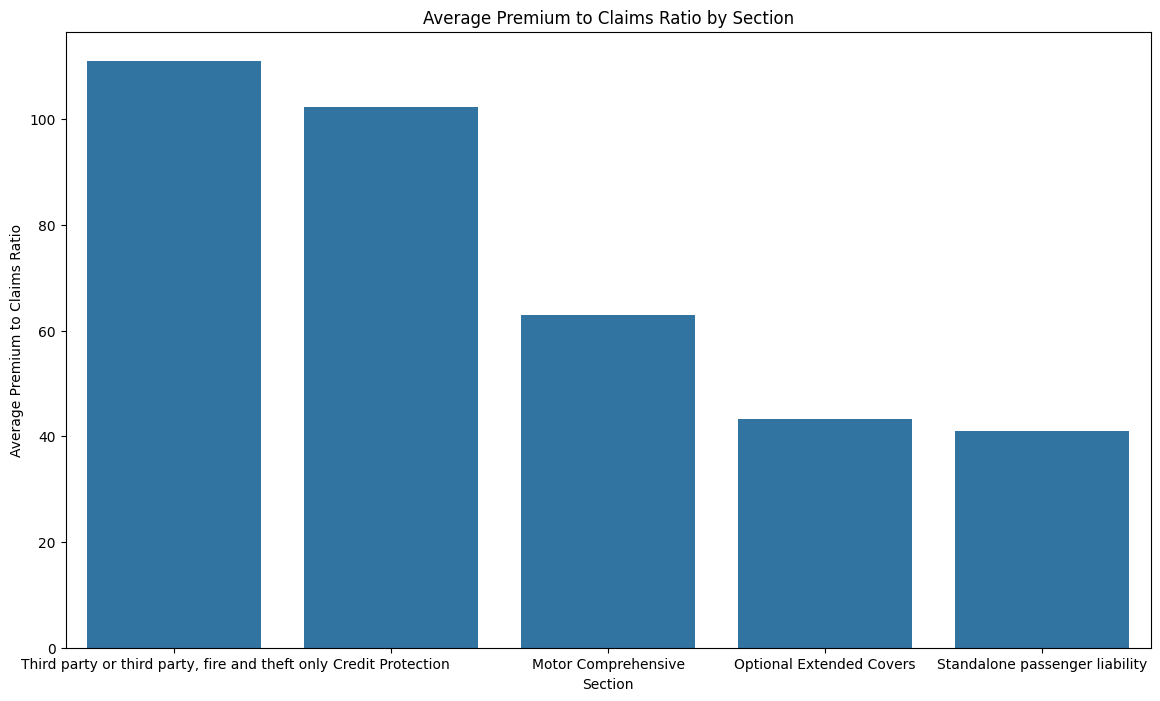

In [31]:
da.bivariate_analysis('Section')

### Key Insights

***Third Party or Third Party, Fire and Theft Only:***

Premium to Claims Ratio: 110.97
This section shows a significantly high ratio, indicating that the premiums collected far exceed the claims paid out. This suggests that the section is low risk and potentially overpriced compared to the claims it generates. A premium reduction may make this section more competitive while still maintaining profitability.

***Credit Protection:**

Premium to Claims Ratio: 102.33
Similar to the third-party section, this also has a high ratio, suggesting it is a low-risk section with premiums exceeding claims by a large margin. A slight adjustment in premiums could help align it better with its risk.

 Premium to Claims Ratio calculated per TermFrequency :
  TermFrequency  PremiumToClaimsRatio
1       Monthly             60.715199
0        Annual             41.030356


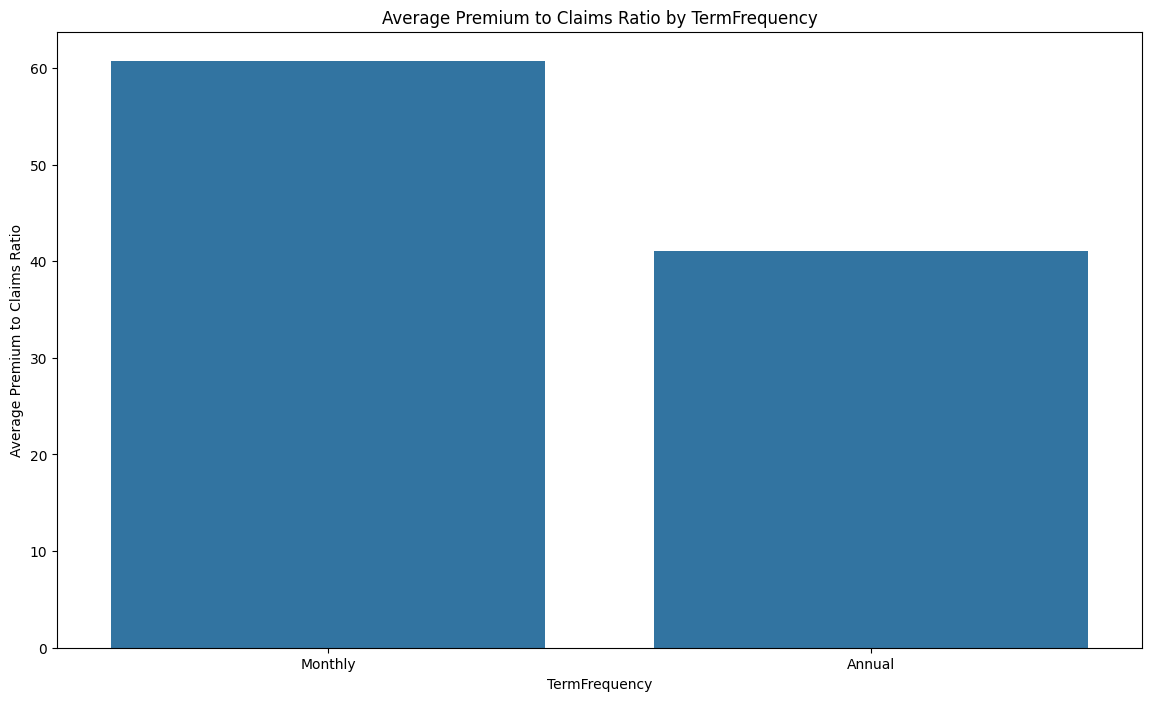

In [32]:
da.bivariate_analysis( 'TermFrequency')

 Premium to Claims Ratio calculated per NewVehicle :
           NewVehicle  PremiumToClaimsRatio
0  Less than 6 months             94.098091
1  More than 6 months             60.651597


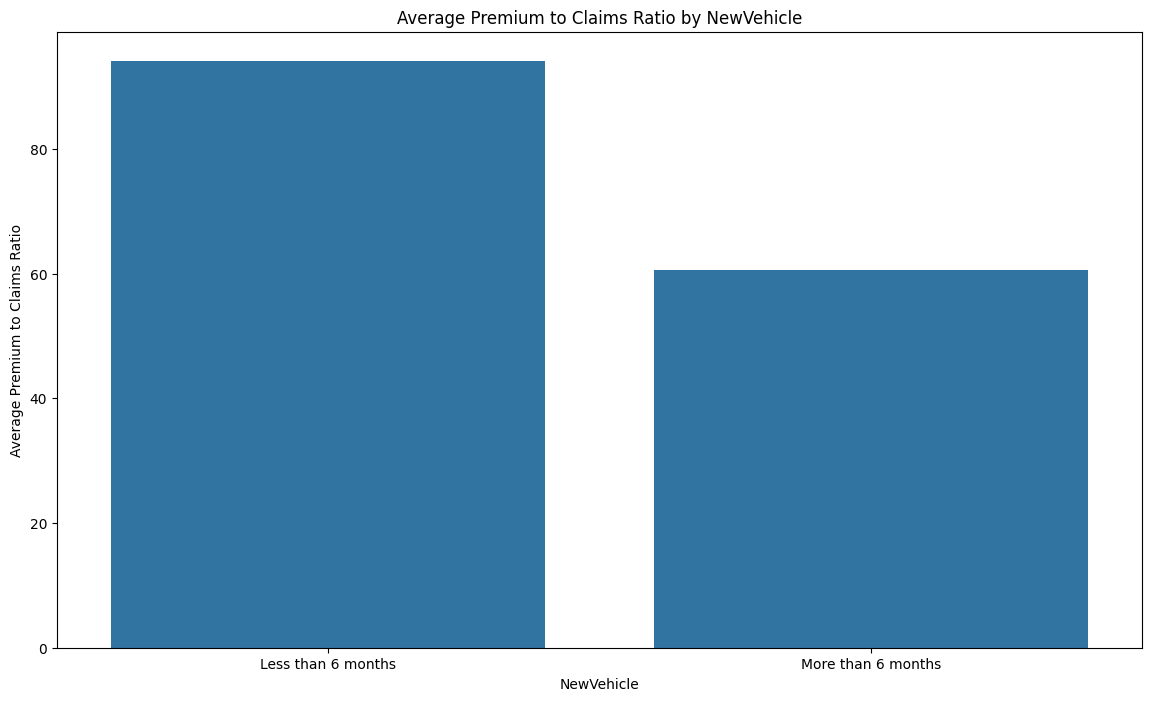

In [33]:
da.bivariate_analysis('NewVehicle')

### Key Insights

***Less than 6 months:***

Premium to Claims Ratio: 94.10
This group shows a significantly higher ratio, indicating that premiums collected greatly exceed claims paid out. Vehicles less than 6 months old are typically less risky due to better condition and potentially lower claims frequency. This suggests they might be a low-risk group and could sustain a premium reduction to improve competitiveness while maintaining profitability.

***More than 6 months:***

Premium to Claims Ratio: 60.65
Vehicles in this category have a much lower ratio, indicating a closer balance between premiums collected and claims paid out. This group appears to have moderate risk, suggesting that the current pricing is reasonable and does not require significant adjustments. Regular monitoring is recommended to ensure profitability.

 Premium to Claims Ratio calculated per TrackingDevice :
  TrackingDevice  PremiumToClaimsRatio
1            Yes             69.061139
0             No             56.339363


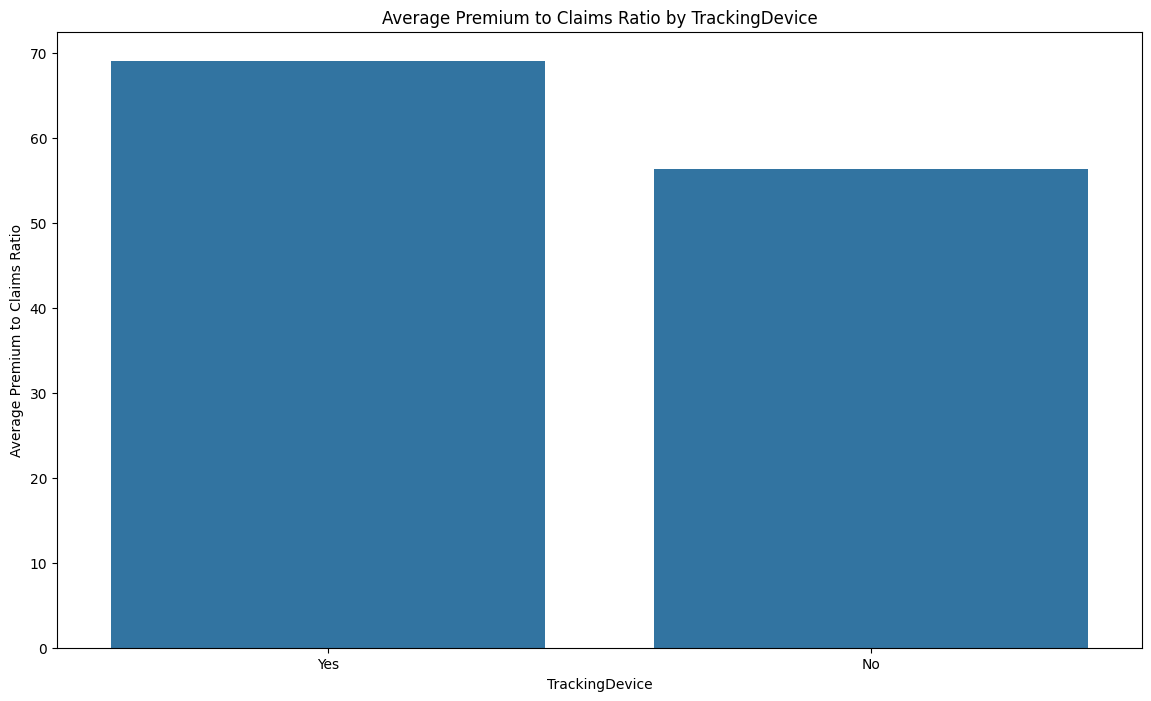

In [34]:
da.bivariate_analysis('TrackingDevice')

 Premium to Claims Ratio calculated per AlarmImmobiliser :
  AlarmImmobiliser  PremiumToClaimsRatio
0               No             66.644574
1              Yes             60.703089


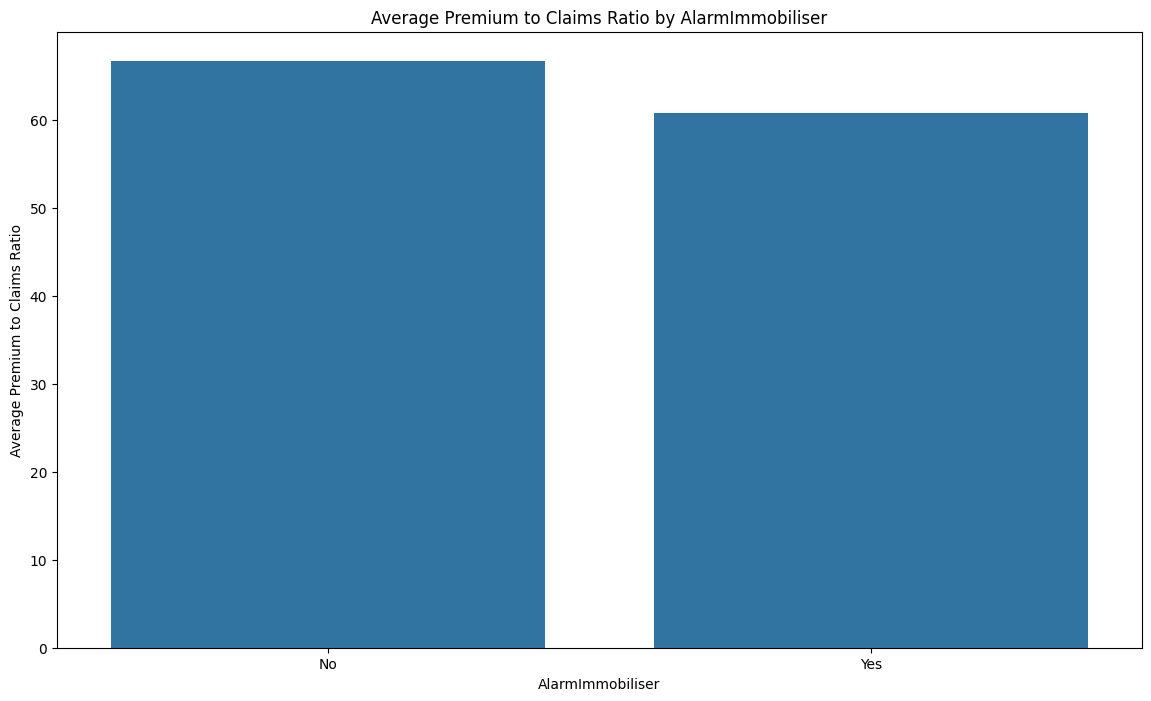

In [35]:
da.bivariate_analysis( 'AlarmImmobiliser')

 Premium to Claims Ratio calculated per bodytype :
   bodytype  PremiumToClaimsRatio
2       C/P             78.561752
8       P/V             72.569056
12      SUV             68.720500
0       B/S             62.327082
1       C/C             61.499065
9       S/C             50.072811
11      S/W             47.568841
5       D/S             43.590678
7       MPV             41.447082
10      S/D             35.012633
3       CCL             32.890754
6       H/B             28.849861
4       D/C             22.174062


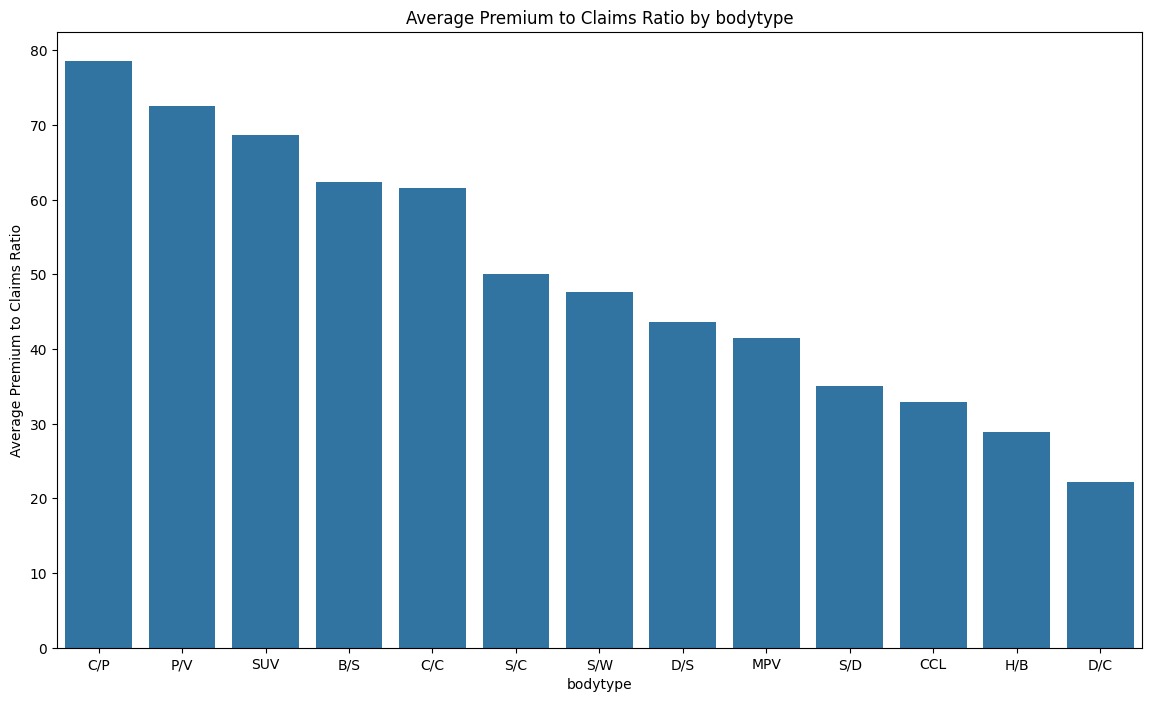

In [36]:
da.bivariate_analysis('bodytype')

### Key Insights

C/P (78.56), P/V (72.57), and SUV (68.72): These body types have relatively high ratios, indicating that premiums collected substantially exceed claims paid out. This suggests that these groups may be low risk and could sustain premium reductions to improve competitiveness while maintaining profitability.

## Multivariate Analysis

 Premium to Claims Ratio calculated per ['Province', 'Gender'] :
         Province         Gender  PremiumToClaimsRatio
5   KwaZulu-Natal         Female            107.099927
7   KwaZulu-Natal  Not specified             77.824747
0    Eastern Cape  Not specified             70.148696
1      Free State  Not specified             64.005798
9         Limpopo  Not specified             62.794970
4         Gauteng  Not specified             60.715937
20   Western Cape  Not specified             57.724807
10     Mpumalanga         Female             54.466922
12     Mpumalanga  Not specified             53.509408
11     Mpumalanga           Male             53.169777
15     North West  Not specified             52.604026
2         Gauteng         Female             51.871402
17  Northern Cape  Not specified             49.354873
8         Limpopo           Male             46.590999
3         Gauteng           Male             45.734381
16  Northern Cape         Female             43.859649


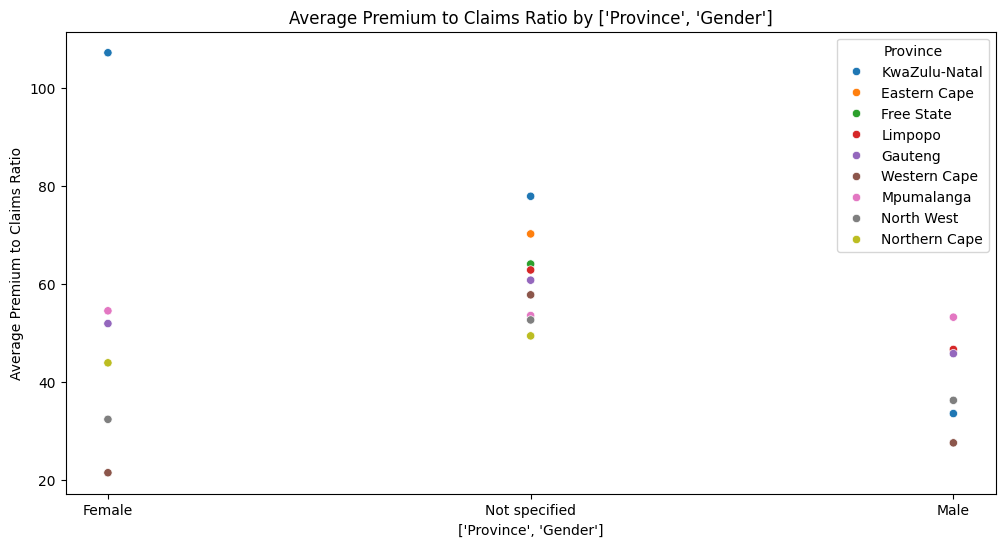

In [37]:
da.multivariate_analysis() 

### Key Insights

KwaZulu-Natal (Female): 107.10 — Indicates a very high ratio, suggesting overpricing relative to claims. Premium adjustments may enhance competitiveness.

 Premium to Claims Ratio calculated per ['Province', 'MaritalStatus'] :
         Province  MaritalStatus  PremiumToClaimsRatio
4   KwaZulu-Natal        Married            113.430181
2         Gauteng        Married             81.231680
5   KwaZulu-Natal  Not specified             76.507769
0    Eastern Cape  Not specified             70.148696
1      Free State  Not specified             64.005798
6         Limpopo  Not specified             61.530543
3         Gauteng  Not specified             60.107187
11   Western Cape  Not specified             55.023318
7      Mpumalanga  Not specified             53.509314
8      North West        Married             53.347823
9      North West  Not specified             51.845271
10  Northern Cape  Not specified             49.354012
12   Western Cape         Single             28.268276


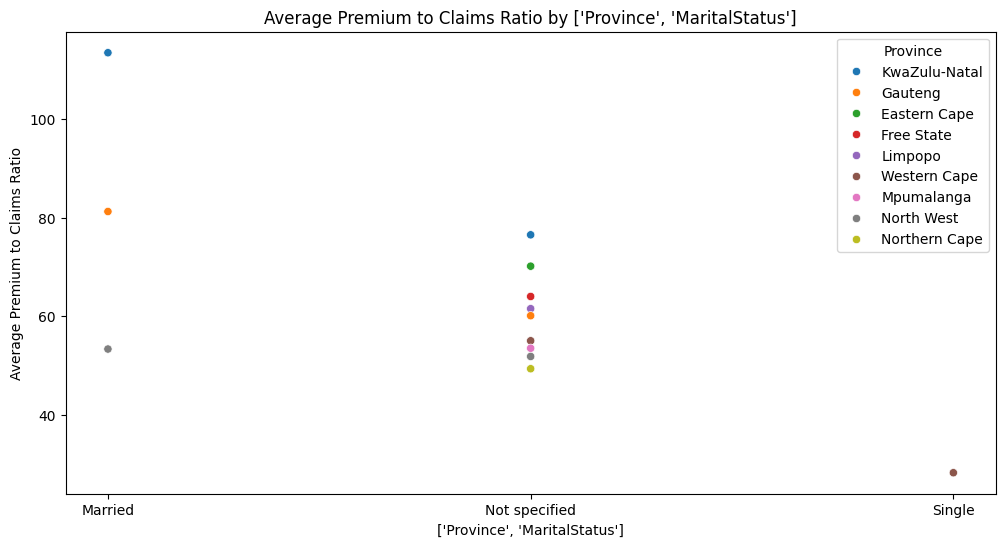

In [38]:
da.multivariate_analysis_2() 

### Key Insights

***KwaZulu-Natal (Married): 113.43*** — The highest ratio in this analysis suggests significant overpricing relative to claims. This group represents low risk and could benefit from premium reductions to enhance competitiveness.
***Gauteng (Married): 81.23** — Indicates low risk with premiums exceeding claims significantly.

<Axes: xlabel='TotalClaims', ylabel='TotalPremium'>

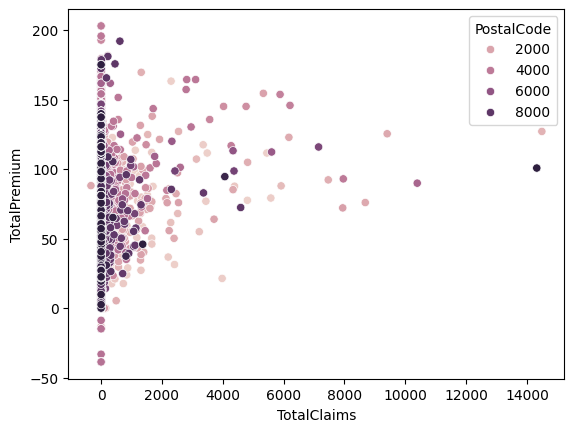

In [39]:
## Relationship between TotalPremium, TotalClaims and PostalCode
corr = df.groupby(['PostalCode','TransactionMonth']).agg({'TotalClaims':'mean','TotalPremium':'mean'}).reset_index()
sns.scatterplot(data=corr, x=corr['TotalClaims'],y=corr['TotalPremium'], hue=corr['PostalCode'])

Text(0.5, 1.0, 'Correlation Matrix')

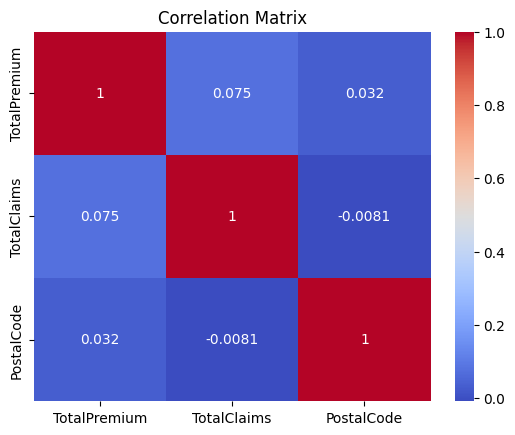

In [40]:
# Correlation matrix
correlation_matrix = corr[['TotalPremium', 'TotalClaims', 'PostalCode']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

### Key Insight

There is no strong relationship betweem PostalCode, TotalClaims and Total Premium.

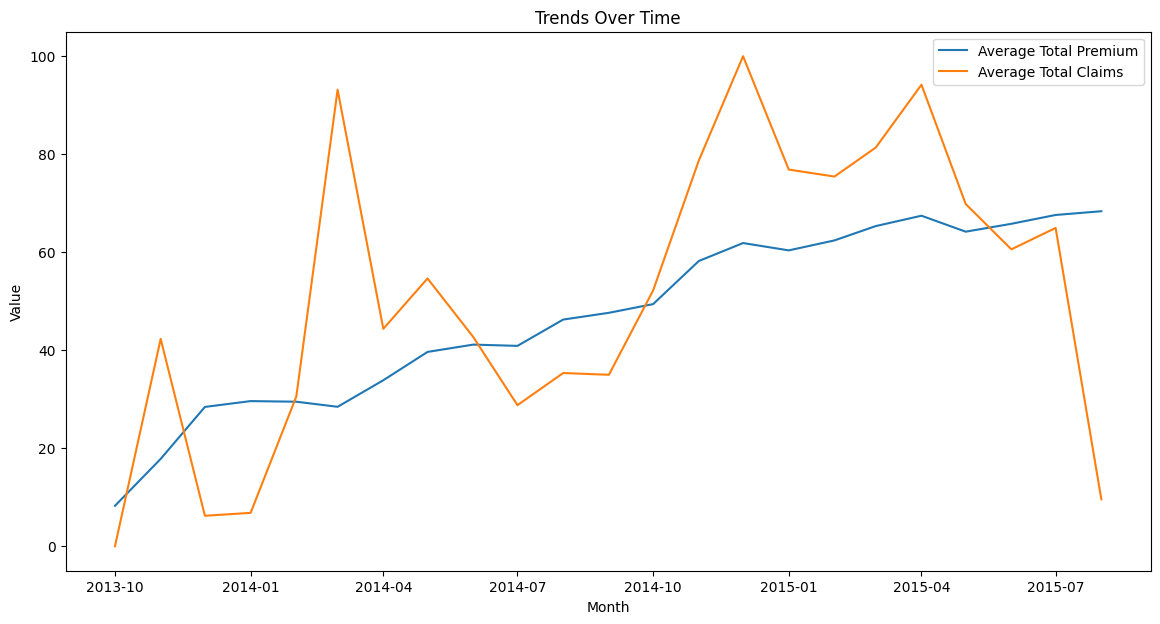

In [41]:
## Total Premium and Claims overtime
da.time_analysis()

### Key Insight 

Overall The Average Claims seems to be decreasing while premium is increasing which shows the insurer is profiitable. 